In [2]:
import pickle

with open('../spy5m_labelled_episodes.pkl', 'rb') as f:
    df_original = pickle.load(f)

# PZ algorithm has some look ahead so remove the episode labels, will be uesd only for some kind of analysis afterwards
df = df_original.drop(columns=['episode']) 
# df

/home/reshawn/miniconda3/envs/clfr/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 10, using nperseg = 10
  warnings.warn('nperseg = {0:d} is greater than input length '


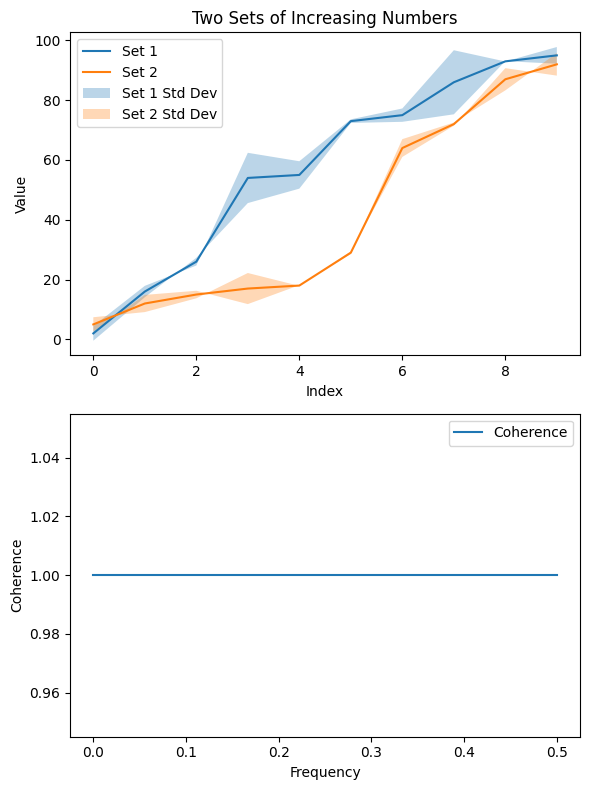

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import coherence


np.random.seed(0)
set1 = np.sort(np.random.choice(np.arange(0, 100), 10, replace=False))
set2 = np.sort(np.random.choice(np.arange(0, 100), 10, replace=False))
x1 = np.arange(10)
x2 = np.arange(10)
std_dev1 = np.random.normal(0, 1, 10) * 5
std_dev2 = np.random.normal(0, 1, 10) * 5
# Generate coherence values
f, coherence_values = coherence(set1, set2, fs=1)

plt.figure(figsize=(6, 8))  
# Plot the sets using seaborn
ax1 = plt.subplot(2, 1, 1)
sns.lineplot(x=x1, y=set1, label='Set 1')
sns.lineplot(x=x2, y=set2, label='Set 2')
# Add shaded faces for standard deviation
plt.fill_between(x1, set1 - std_dev1, set1 + std_dev1, alpha=0.3, label='Set 1 Std Dev')
plt.fill_between(x2, set2 - std_dev2, set2 + std_dev2, alpha=0.3, label='Set 2 Std Dev')

plt.title('Two Sets of Increasing Numbers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Plot the coherence values
ax2 = plt.subplot(2, 1, 2)
plt.plot(f, coherence_values, label='Coherence')
plt.xlabel('Frequency')
plt.ylabel('Coherence')
plt.legend()

plt.tight_layout()  # adjust the layout to fit the figure size
plt.show()